# Perceptor

The convergence of the perceptron is only guaranteed if the two classes are linearly separable and the learning rate is small enought.

If the classes can't be separated by a line, we can set a maximin number of passes over the training dataset (epochs) and/or a threshold for the number of tolerated missclassifactions.

![Linearly Separable and Not Linearly Separable ](https://github.com/edzzn/Machine_Learning/blob/master/images/linearly_separable_not_separable.png?raw=true)

# Perception Rule diagram
![](https://sebastianraschka.com/images/faq/classifier-history/perceptron-figure.png)

The perceptron recieves the inputs __x__ and combines them with the weights __w__.

Then the net input is passed to the activation funtion that outputs -1 or 1. In the learning phase the output is used to calculate the error and update the weights.

# Implementation Perceptron Learning Algorithm

This is an implemetation on the __Iris Dataset__


In [52]:
import numpy as np

In [51]:
class Perceptron(object):
    """
    Perceptron classifier
    
    Parameters
    ------------
    eta: float
        Learning rate (0.0 - 1.0)
    n_iter : int
        Passes over the training dataset - (4epoch)
        
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of  misclassifications  in every epoch
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """
        Parameters
        ------------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number
            of samples and n_features is the number of features
            
        y: array-like, shape = [n_samples]
            Target values.
        
        :return: object
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """
        Calculate the net input 
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Returns class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Training
We'll load only the data for the __Setosa__ and __Versicolor__ 

In [42]:
# Import pandas to load the iris dataset
import pandas as pd

# UCI ML Repository
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) 

# We can see that the data loaded correctly,
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


We only need the first 100 samples. 50 for Setosa and 50 for Versicolor. To better classify we'll convert the Versicolor label to _1_, and the Setosa to _-1_. This data will be saved in a vector __y__.

We'll also extract the first feature (setal lenght) and the third one (petal length) and assing them to a matrix __X__. This is only to allow us to visualice the data in a 2D plot


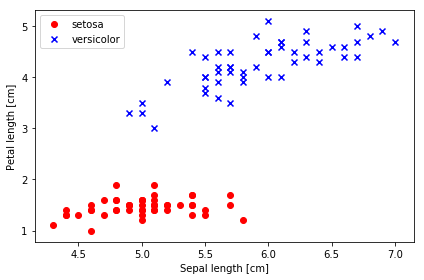

In [53]:
# We get the first 100 valus of the flower type
y = df.iloc[0:100, 4].values

# We transform the labels to 1 or -1
y = np.where(y == 'Iris-setosa', -1, 1)

# We get the 1st and 3rd feature
X = df.iloc[0:100, [0,2]].values

# Now we plot our data
from matplotlib import pyplot as plt

# We plot the # We plot the Setosa
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')

# We plot the Versicolor
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

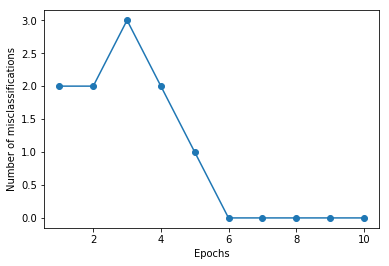

In [55]:
# Lets train the Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) +1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [76]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolors='black',
                    marker=markers[idx], label=cl)

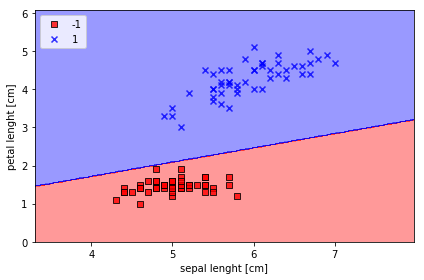

In [77]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Reference:
Raschka, Sebastian. Python machine learning. Birmingham, UK: Packt Publishing, 2015.

[link to the Book](https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning)


This notebook is strongly based on the book... This is a tool for me to understand the material. 

If you think this is useful in any kind, go to Rascka github [Repo](https://github.com/rasbt/python-machine-learning-book). He has the material in a much better and comprehensive way. 